<a href="https://colab.research.google.com/github/bkytpe/MachineLearning/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

layer比較


mlp:

layers = [
    #784 * 128 + 128(bias)，128是自己決定的
    Dense(128,activation = "relu",input_dim = 784,name= "Dense_128"),
    #128 * 10 + 10(bias)，10是因為手寫數字共有0-9種可能
    Dense(10,activation = "softmax")
]

cnn: 
- 卷積就是過濾，透過人為定義的索伯運算子來做過濾，後來連過濾器都讓網絡自己學

layers = [
    
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)), #64個3*3的過濾器
    MaxPooling2D(),
    Conv2D(128, 3, activation="relu", padding="same"),#卷積改變通道數，弛化改變長寬
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]

In [11]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train,y_train),(x_test,y_test) = load_data()

In [12]:
# minst: reshape(50000,28,28,1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [13]:
labels = [
          
          "airplane",
          "automobile",
          "bird",
          "cat",
          "deer",
          "dog",
          "car",
          "horse",
          "ship",
          "truck"
]

automobile


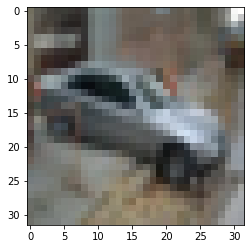

In [14]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0,49999)
print(labels[y_train[idx][0]])
plt.imshow(x_train[idx])

In [20]:
#參考VG16概念
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
layers = [
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)), #64個3*3的過濾器
    MaxPooling2D(),
    Conv2D(128, 3, activation="relu", padding="same"),#卷積改變通道數，弛化改變長寬
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

- 1792:(3 * 3 * 3) * 64 + 64 #每個過濾器會重設及格點(臨界點) sum(wixi+bias)
- 73856: (3 * 3 * 64) * 128 + 128

In [37]:
x_train_norm = x_train/255 #卷積(cnn)可以接受大於一維的資料，所以不用reshape成一維
x_test_norm = x_test/255
x_train.shape

(50000, 32, 32, 3)

In [22]:
#fit前必須compile
#深度學習三步驟: 堆積木>決定跟正確距離(loss)>逐步調整(梯度下降)
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
        metrics=["accuracy"])

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    EarlyStopping(patience = 5,restore_best_weights=True),
    ModelCheckpoint("model.h5",save_best_only=True)
]
# validation_split: 切出一部分資料驗證
# batch_size: 看多少筆才做一次調整(梯度下降)
# epochs: 訓練次數(60000-6000筆/epoch)
# 1 epoch 多少次梯度下降: 54000 / 200 -> 270
# verbose: 印出多少log(1:default 0:quiet 2:)
model.fit(x_train_norm,
      y_train,
      validation_split = 0.1, 
      batch_size=200, #看多少筆做一次梯度下降
      epochs = 50,#模型訓練次數
      verbose = 2,#每次一行
      callbacks = callbacks)

Epoch 1/50
225/225 - 3s - loss: 1.7173 - accuracy: 0.3692 - val_loss: 1.3503 - val_accuracy: 0.5152
Epoch 2/50
225/225 - 3s - loss: 1.2987 - accuracy: 0.5353 - val_loss: 1.1249 - val_accuracy: 0.6050
Epoch 3/50
225/225 - 3s - loss: 1.1080 - accuracy: 0.6076 - val_loss: 0.9521 - val_accuracy: 0.6612
Epoch 4/50
225/225 - 3s - loss: 0.9648 - accuracy: 0.6625 - val_loss: 0.8529 - val_accuracy: 0.7024
Epoch 5/50
225/225 - 3s - loss: 0.8729 - accuracy: 0.6965 - val_loss: 0.8226 - val_accuracy: 0.7112
Epoch 6/50
225/225 - 3s - loss: 0.8011 - accuracy: 0.7213 - val_loss: 0.8078 - val_accuracy: 0.7220
Epoch 7/50
225/225 - 3s - loss: 0.7320 - accuracy: 0.7463 - val_loss: 0.7600 - val_accuracy: 0.7398
Epoch 8/50
225/225 - 3s - loss: 0.6622 - accuracy: 0.7689 - val_loss: 0.7467 - val_accuracy: 0.7378
Epoch 9/50
225/225 - 3s - loss: 0.6164 - accuracy: 0.7867 - val_loss: 0.7613 - val_accuracy: 0.7382
Epoch 10/50
225/225 - 3s - loss: 0.5650 - accuracy: 0.8019 - val_loss: 0.6814 - val_accuracy: 0.7622

In [24]:
model.evaluate(x_test_norm,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7148 - accuracy: 0.7612


[0.7147771716117859, 0.7612000107765198]

In [30]:
print(y_test.shape) #二維表格
pre.shape

(10000, 1)


(10000,)

In [33]:
y_test_r = y_test.reshape(-1) #-1:請你幫我算
y_test_r.shape

(10000,)

In [25]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
con_mat = confusion_matrix(y_test_r,pre) #出了tensorflow就帶原本的
pd.DataFrame(con_mat,index= ["{}(真實)".format(labels[i]) for i in range(10)],
             columns = ["{}(預測)".format(labels[i]) for i in range(10)]
             )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),car(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),773,15,42,22,16,6,9,7,77,33
automobile(真實),12,876,6,4,0,2,6,1,19,74
bird(真實),50,5,647,42,91,65,51,22,16,11
cat(真實),19,9,56,591,64,145,68,21,17,10
deer(真實),8,2,62,50,748,28,51,40,9,2
dog(真實),9,4,47,170,53,656,16,34,6,5
car(真實),3,4,40,56,26,9,844,3,10,5
horse(真實),16,2,38,37,70,42,7,778,4,6
ship(真實),40,30,10,14,4,4,1,4,872,21
truck(真實),22,77,7,23,6,6,10,4,18,827


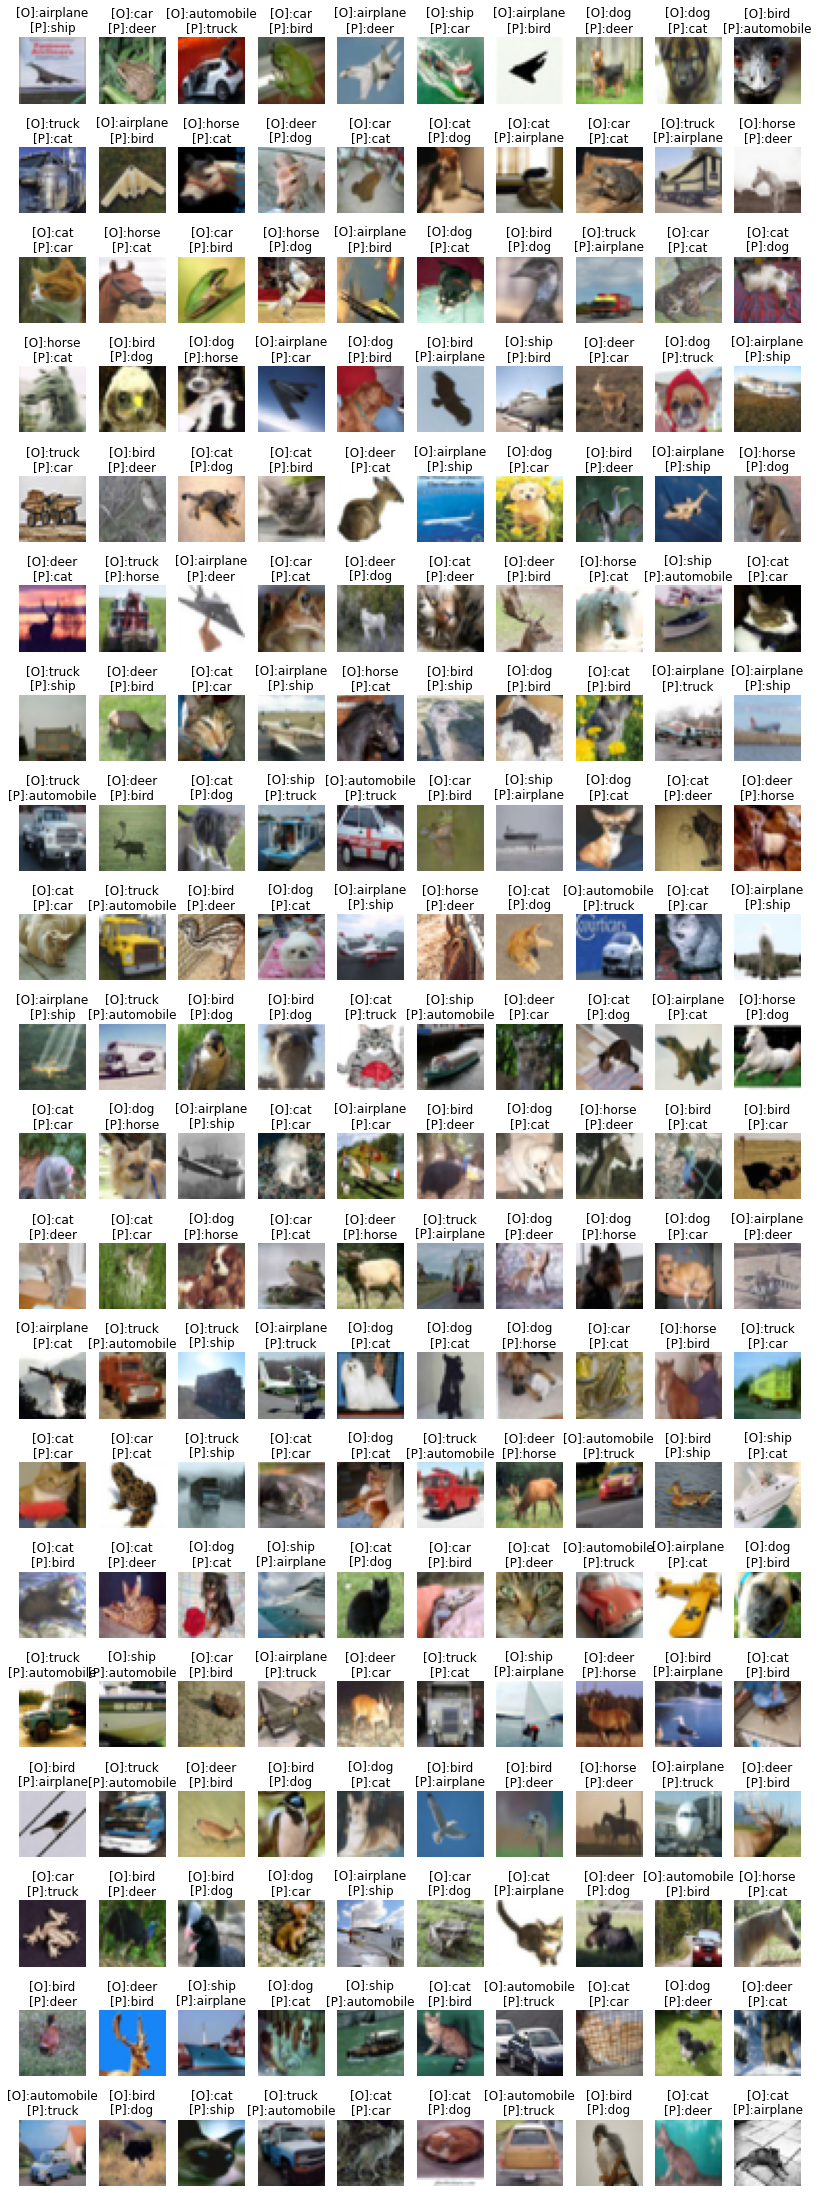

In [32]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200] #預測錯誤太多，只看前200筆
false_pre = pre[idx]
false_ori = y_test_r[idx]
false_img = x_test[idx]
plt.figure(figsize = (14,42))
width = 10
height = len(idx)//width + 1
for i in range(len(idx)):
    plt.subplot(height, width , i+1)
    t = "[O]:{}\n[P]:{}".format(labels[false_ori[i]], labels[false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])

url:https://www.funtime.com.tw/blog/wp-content/uploads/2017/06/1.png


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


airplane 的機率: 0.076
automobile 的機率: 0.001
bird 的機率: 0.0
cat 的機率: 0.001
deer 的機率: 0.0
dog 的機率: 0.0
car 的機率: 0.0
horse 的機率: 0.0
ship 的機率: 0.922
truck 的機率: 0.0
答案: ship


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


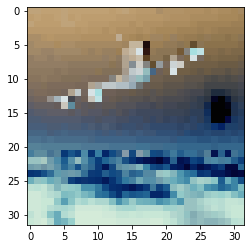

In [44]:
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
import requests
url = input("url:")
headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"
}
response = requests.get(url, stream=True, verify=False, headers=headers)

img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img = 1 - np.array(img) #黑轉白
img_r = img.reshape(1,32,32,3)/255 #一筆32*32*3的圖片
proba = model.predict(img_r)[0]
for i in range(10):
    print(labels[i], "的機率:", round(proba[i], 3))
ans = model.predict_classes(img_r)[0]
print("答案:", labels[ans])
plt.imshow(img, cmap="gray")
#https://www.funtime.com.tw/blog/wp-content/uploads/2017/06/1.png

#ValueError: Input 0 of layer sequential_2 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (32, 32, 3)